In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 9
np.random.seed(SEED)

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='label', ylabel='count'>

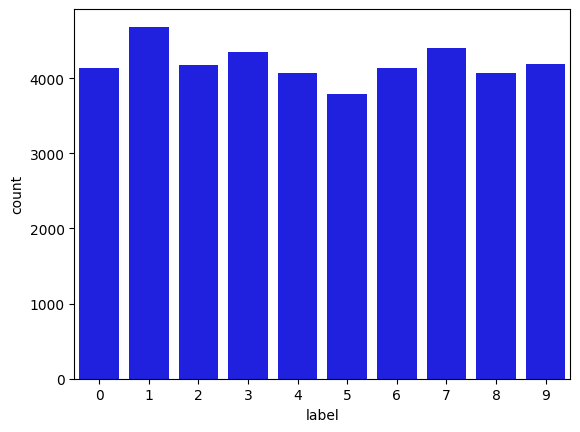

In [5]:
sns.countplot(x=train['label'], color='b')

In [6]:
X_train = train.drop(columns='label')
y_train = train['label']
X_test = test

In [7]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (42000, 784)
y_train shape: (42000,)
X_test shape: (28000, 784)


In [8]:
X_train /= 255.
X_test /= 255.

In [9]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [11]:
y_train = keras.utils.to_categorical(y_train)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=SEED)

In [14]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

model = keras.Sequential(
[
    Conv2D(32, 3, padding='Same', activation='relu', input_shape=(28,28,1), kernel_initializer="he_normal"),
    Conv2D(64, 3,padding='Same', activation='relu', kernel_initializer="he_normal"),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(0.25),
    Dense(128, activation="relu", kernel_initializer="he_normal"),
    Dropout(0.5),
    Dense(10, activation='softmax'),
]
)

In [18]:
model.compile(optimizer = "nadam", loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
datagen = ImageDataGenerator(
        rotation_range=5,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

In [19]:
# Fit the model
batch_size = 128
history = model.fit(datagen.flow(X_train,y_train),
                              batch_size = batch_size,
                              epochs = 30,
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = (X_val,y_val),
                             )

Epoch 1/30
295/295 [==============================] - 28s 88ms/step - loss: 0.8740 - accuracy: 0.7169 - val_loss: 0.1381 - val_accuracy: 0.9543
Epoch 2/30
295/295 [==============================] - 25s 85ms/step - loss: 0.3797 - accuracy: 0.8773 - val_loss: 0.0830 - val_accuracy: 0.9764
Epoch 3/30
295/295 [==============================] - 26s 87ms/step - loss: 0.2984 - accuracy: 0.9067 - val_loss: 0.0733 - val_accuracy: 0.9774
Epoch 4/30
295/295 [==============================] - 26s 90ms/step - loss: 0.2573 - accuracy: 0.9243 - val_loss: 0.0652 - val_accuracy: 0.9821
Epoch 5/30
295/295 [==============================] - 27s 90ms/step - loss: 0.2308 - accuracy: 0.9318 - val_loss: 0.0578 - val_accuracy: 0.9814
Epoch 6/30
295/295 [==============================] - 26s 88ms/step - loss: 0.2120 - accuracy: 0.9360 - val_loss: 0.0459 - val_accuracy: 0.9848
Epoch 7/30
295/295 [==============================] - 26s 87ms/step - loss: 0.1954 - accuracy: 0.9411 - val_loss: 0.0433 - val_accuracy:

In [20]:
preds = model.predict(X_val)

132/132 [==============================] - 2s 16ms/step


In [21]:
preds_labels = np.argmax(preds,axis = 1)
y_val_labels = np.argmax(y_val,axis = 1)

errors = (preds_labels - y_val_labels != 0)
preds_errors = preds_labels[errors]
preds_true = y_val_labels[errors]
X_val_true = X_val[errors]

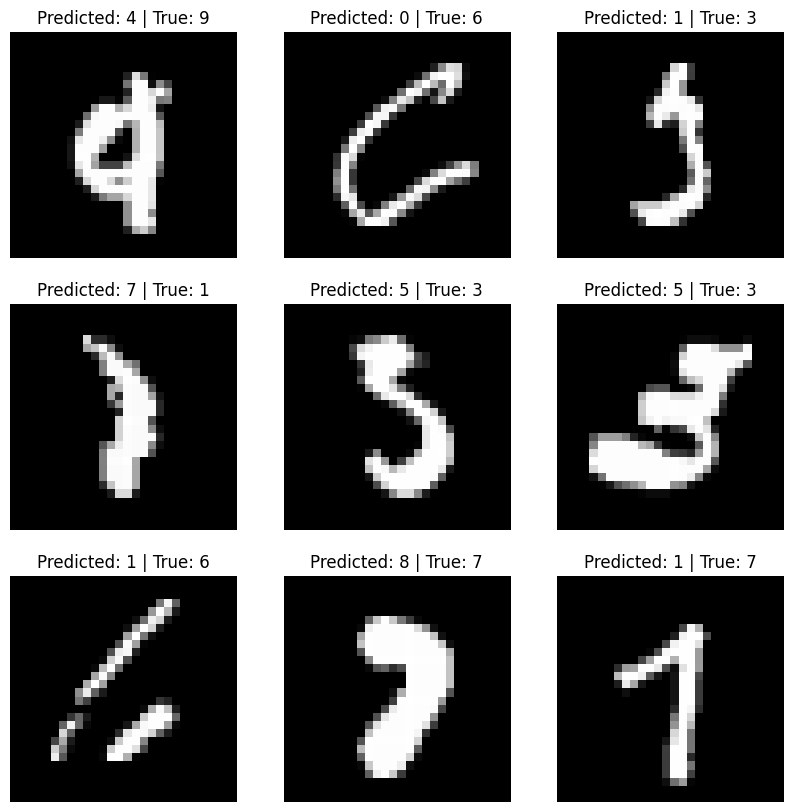

In [22]:
i = 0
fig, axes = plt.subplots(3,3,figsize=(10,10), sharex=True, sharey=True)
for row in range(3):
    for col in range(3):
        axes[row,col].imshow((X_val_true[i]), cmap='gray')
        axes[row,col].set_title(f'Predicted: {preds_errors[i]} | True: {preds_true[i]}')
        axes[row,col].axis('off')
        i += 1
plt.show()

# Submission

In [23]:
my_results = model.predict(X_test)
my_results = np.argmax(my_results, axis=1)
labels = pd.Series(my_results, name='Label')
imageIds = pd.Series(range(1,28001), name='ImageId')

875/875 [==============================] - 14s 15ms/step


In [24]:
my_submission = pd.concat([imageIds, labels], axis=1)

In [25]:
my_submission.to_csv("submission.csv",index=False)